# Lab 10

## I. Hill Climbing


The Hill Climbing Method is a simple optimization algorithm that tries to find the optimal solution to a problem by iteratively improving the current solution. It is a local search algorithm, which means that it only considers the solutions that are in the neighborhood of the current solution.

Here's how the Hill Climbing Method works:

1. Start with an initial state -- a candidate to the solution of the problem.

2. Evaluate the current state to determine its quality or fitness.

3. Generate a set of neighboring states by making small modifications to the current one.

3. Evaluate the fitness of each neighboring state.

4. Select the best neighboring state and make it the new current one.

5. Repeat steps 3 to 5 until no further improvement can be made or a predefined stopping criterion is met.

One of the main advantages of the Hill Climbing Method is its simplicity and ease of implementation. 

Consider the Bukin funcion N6, from the basic optimisation benchmark set:

$$f(x,y) =  100 \sqrt{|y-0.01 x^2|}+ 0.01 |x+10|.$$

For $-15 \leqq x \leqq -5$ and $-3 \leqq y \leqq 3$ we have a minimum point $f(-10, 1) = 0$.


*Ex. 1:*

Implement a function $f$ for this function and represent it graphic using matplotlib.
(Bukin function N6 is a mathematical function used to test optimization algorithms)

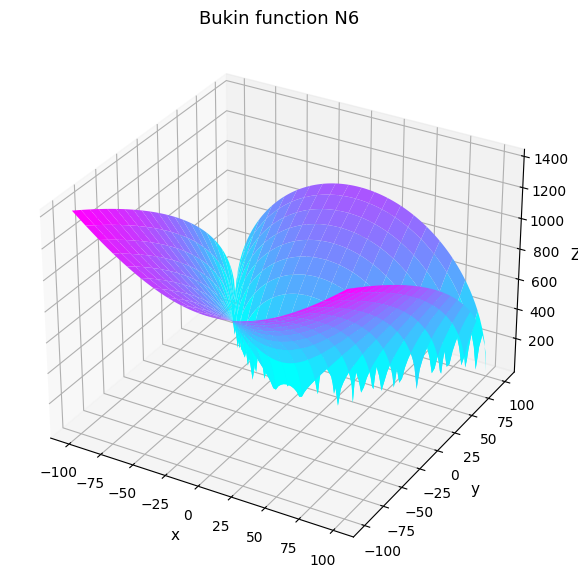

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Define the Bukin function N6 that takes in two arguments x and y
# The function returns the result of applying the Bukin function N6 to x and y
def f(x, y):
    return 100 * np.sqrt(np.abs(y - 0.01*(x * x))) + 0.01 * np.abs(x + 10)

# Generate a range of 100 equally spaced numbers between -100 and 100 (for the x and y coordinates of the surface plot))
x = np.linspace(-100, 100, 100)
y = np.linspace(-100, 100, 100)

# Create a 2D grid of the x and y coordinates (evaluate the Bukin function N6 over the entire x-y domain)
X, Y = np.meshgrid(x, y)

# Evaluate the Bukin function N6 at each point in the x-y domain using the meshgrid
Z = f(X,Y)

# Create a new figure with a 3D axis projection
fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection='3d')

# Create a surface plot of the Bukin function N6
# Use rstride and cstride to control the number of row and column strides for the plot
# Use cmap to set the color map for the plot
ax.plot_surface(X, Y, Z, rstride=5, cstride=5, cmap='cool')

# Set the title and axis labels for the plot
ax.set_title("Bukin function N6", fontsize = 13)
ax.set_xlabel('x', fontsize = 11)
ax.set_ylabel('y', fontsize = 11)
ax.set_zlabel('Z', fontsize = 11)

# Display the plot
plt.show()

*Ex. 2:* 

Write a Hill Climbing algorithm that finds this functions minimum.

Hints: 

define a state, define a neighbour, choose a proper stop criteria before implementing the algorithm.

In [11]:
# initial state
start_x = -10
start_y = -3

# goal state
end_x = -5
end_y = 3

step = 1
tol = 0 # stop criterion

# gradient descent
while(start_x <= end_x and start_y <= end_y):
    
    current_value = f(start_x, start_y) # current value
    
    # calculate the value of the four neighbors
    left_value = f(start_x - step, start_y)
    right_value = f(start_x + step, start_y)
    down_value = f(start_x, start_y - step)
    up_value = f(start_x, start_y + step)
    
    # find the minimum value
    min_value = min(left_value, right_value, down_value, up_value)
   
    # update the current state
    if min_value < current_value:
        if min_value == left_value:
            start_x -= step
        elif min_value == right_value:
            start_x += step
        elif min_value == down_value:
            start_y -= step
        else:
            start_y += step
    else:
        break
    
    # check the stop criterion
    if abs(min_value - current_value) <= tol:
        break
    
# print the minimum point and value
min_point = (start_x, start_y)
min_value = f(start_x, start_y)

print(min_point, min_value)

(-10, 1) 0.0


*Ex. 3:* for 1 point 

Implement a hill climbing algorithm for the knapsack problem. 

Hints:
For n elements:

we begin with an empty string of n zeros.

a neighbour is constructed by switching of zero into an one at a position in the array

Does it find the optimum? 


In [12]:
# initial state
def knapsack_value(solution, values, weights, capacity):
    # calculate the total value and weight
    total_value = np.sum(solution * values)
    total_weight = np.sum(solution * weights)
    
    # penalize the total value if the total weight exceeds the capacity
    if total_weight > capacity:
        total_value -= (total_weight - capacity) * np.mean(values)
    
    return total_value

# hill climbing
def hill_climbing_knapsack(values, weights, capacity, max_iterations=1000):
    n = len(values)
    current_solution = np.zeros(n) # empty string of n zeros
    
    # create a random initial solution
    current_value = knapsack_value(current_solution, values, weights, capacity)
    
    for _ in range(max_iterations): # neighbour creation
        neighbor_solution = current_solution.copy()
        index = np.random.randint(n)
        neighbor_solution[index] = 1 - neighbor_solution[index]
        
        # calculate the value of the neighbor solution
        neighbor_value = knapsack_value(neighbor_solution, values, weights, capacity)
        
        # update the current solution
        if neighbor_value > current_value:
            current_solution = neighbor_solution
            current_value = neighbor_value
        
        # check the stop criterion
        if np.all(current_solution == 1) or np.all(current_solution == 0): # stop criterion
            break
    
    return current_solution.astype(int)

# test the hill climbing algorithm
values = np.array([10, 25, 15, 30, 20])
weights = np.array([5, 10, 8, 15, 12])
capacity = 30

# find the solution
solution = hill_climbing_knapsack(values, weights, capacity)

print(solution, ": ", knapsack_value(solution, values, weights, capacity))

[1 0 1 1 0] :  55



*Ex. 4:* for 1 point

Improve it to increase the chances of finding the solution.  

In [13]:
# hill climbing with random restarts
def hill_climbing_knapsack_improved(values, weights, capacity, num_restarts=10, max_iterations=1000):
    best_solution = None
    best_value = -np.inf
    
    # run the hill climbing algorithm for num_restarts times
    for _ in range(num_restarts):
        solution = hill_climbing_knapsack(values, weights, capacity, max_iterations)
        value = knapsack_value(solution, values, weights, capacity)
        
        # update the best solution
        if value > best_value:
            best_solution = solution
            best_value = value
    
    return best_solution

# test the hill climbing algorithm with random restarts
solution = hill_climbing_knapsack_improved(values, weights, capacity)
print(solution, ": ", knapsack_value(solution, values, weights, capacity))


[1 1 0 1 0] :  65
